## Fake News Classification (kaggle.com)

#### For classification tasks, a reliable ensemble learning technique is the Random Forest Classifier. It is composed of several decision trees, each of which was trained using a different collection of features and data. Overfitting is lessened by this unpredictability. All trees provide a "vote" during prediction, with the final forecast being determined by the majority. A few noteworthy characteristics are the ability to identify the significance of a feature, resist overfitting, adapt to different classification tasks, and efficiently parallelize big datasets. The model performs better when fine-tuning parameters are used, like changing the number of trees and their depth. Overall, Random Forest is a well-liked and useful machine learning method that can be used to a variety of datasets and is renowned for its ensemble approach.


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
from wordcloud import WordCloud 

import spacy
from spacy.lang.en import English
import time


data = pd.read_csv('/Users/minipalepu/Desktop/ML/bonus ML/WELFake_Dataset.csv', index_col=0)
data.head()


,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [35]:
data = data.fillna(' ')
data['Complete_text'] = data['title'] + ' ' + data['text']
data['cleaned_text'] = data['Complete_text'].apply(lambda x: ' '.join([token.lower() for token in x.split() if token.isalpha()]))
data.head()

,title,text,label,Full_text,cleaned_text,Complete_text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,law enforcement on high alert following threat...,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?,did they post their votes for hillary,Did they post their votes for Hillary already?
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,attorney general says most charlotte rioters w...,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",bobby raised uses story of christian conversio...,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,satan russia unvelis an image of its terrifyin...,SATAN 2: Russia unvelis an image of its terrif...


We will visualize the data using wordcloud

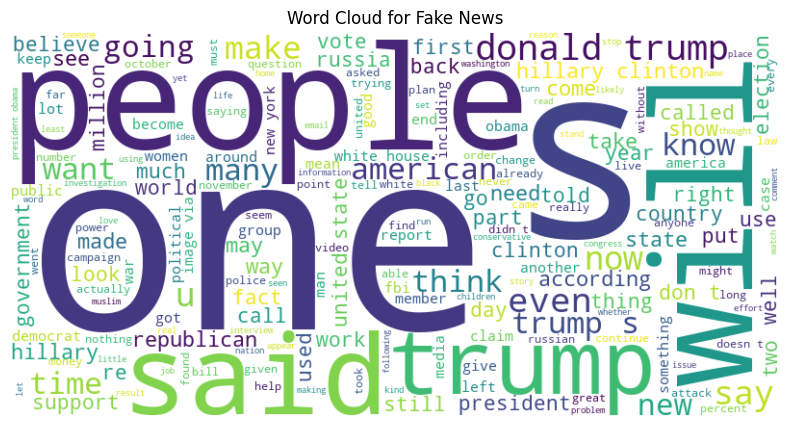

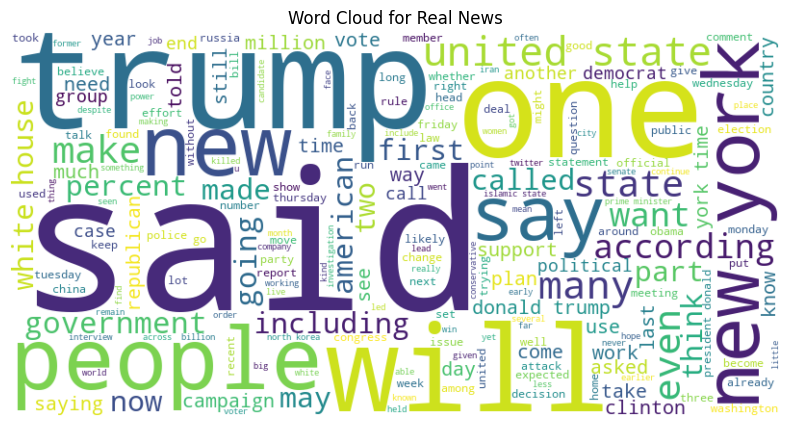

In [36]:
fake_text = " ".join(data[data['label'] == 1]['cleaned_text'])
wordcloudfake = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudfake, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')
plt.show()

real_text = " ".join(data[data['label'] == 0]['cleaned_text'])
wordcloudreal = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(real_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudreal, interpolation='bilinear')
plt.title('Word Cloud for Real News')
plt.axis('off')
plt.show()

The largest words in the word cloud are the most common words, and the smaller words are less common.

We will visualize the distribution of labels in fake news

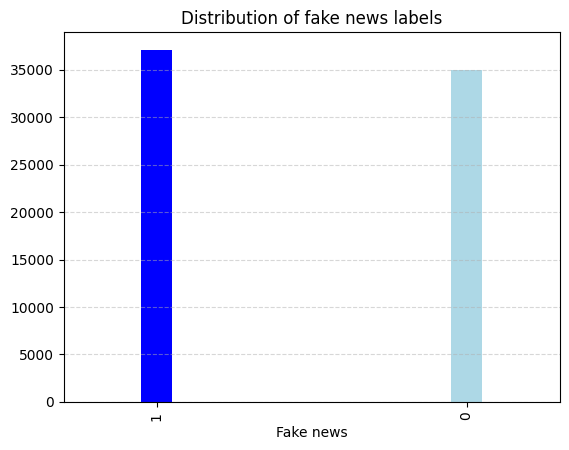

In [37]:
data['label'].value_counts().plot(kind='bar', color=['blue', 'lightblue'], width = 0.1)
plt.xlabel("Fake news")
plt.title("Distribution of fake news labels")
plt.grid(axis='y', linestyle='--', alpha=0.5) 

plt.show()


Now we will convert the text to lowercase, tokenizing it, and remove stopwords

In [38]:
nlp = English()
stop_words = set(stopwords.words('english'))
data['cleaned_text'] = data['Full_text'].apply(lambda text: ' '.join(token.text.lower() for token in nlp(text) if token.text.isalpha() and token.text.lower() not in stop_words))
print(data.cleaned_text.head())


0    law enforcement high alert following threats c...
1                           post votes hillary already
2    unbelievable obama attorney general says charl...
3    bobby jindal raised hindu uses story christian...
4    satan russia unvelis image terrifying new supe...
Name: cleaned_text, dtype: object


Now we will prepare the text data for machine learning by converting it into a matrix of token counts 

In [39]:
vectorizer = CountVectorizer(min_df=100, max_df=0.90, stop_words='english', max_features=10000)
X = vectorizer.fit_transform(data['cleaned_text'])
y = data['label']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train set:', X_train.shape, 'Test set:', X_test.shape)


Train set: (57707, 10000) Test set: (14427, 10000)


We will implement and train the random forest classifier

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      7089
           1       0.88      0.93      0.90      7338

    accuracy                           0.90     14427
   macro avg       0.90      0.90      0.90     14427
weighted avg       0.90      0.90      0.90     14427



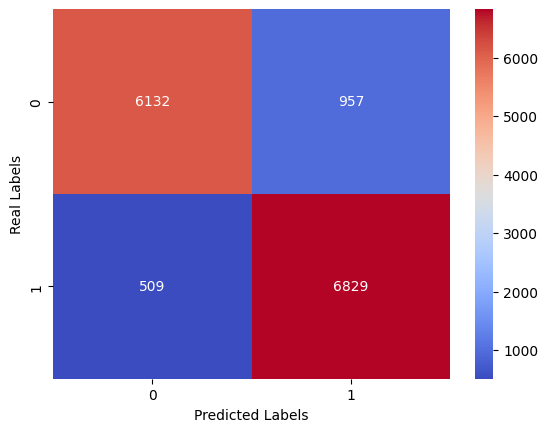

In [42]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')
plt.show()

The model demonstrates strong performance with an accuracy of 90%. It effectively distinguishes between real and fake news, achieving a balanced trade-off between precision and recall for both classes. The adjustments made to mitigate overfitting have contributed to the model's generalization capabilities. The number of trees were adjusted to obtain these results.

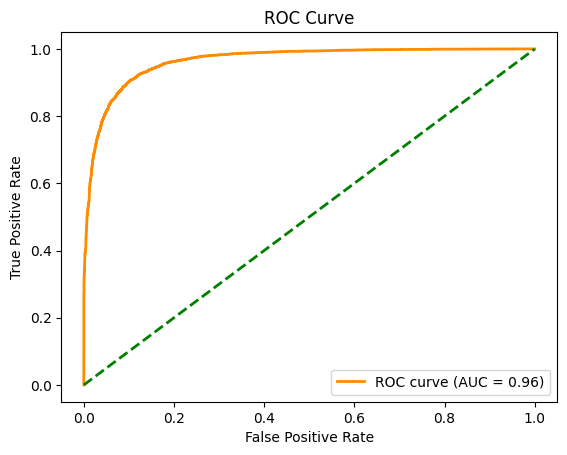

In [45]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

y_prob = classifier.predict_proba(X_test)[:, 1]

f, t, _ = roc_curve(y_test, y_prob)
auc = auc(f, t)

plt.figure()
plt.plot(f, t, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


The ROC curve shows a very good classifier, with an AUC of 0.96. This means that the classifier is good at distinguishing between positive and negative examples, even at different threshold values.

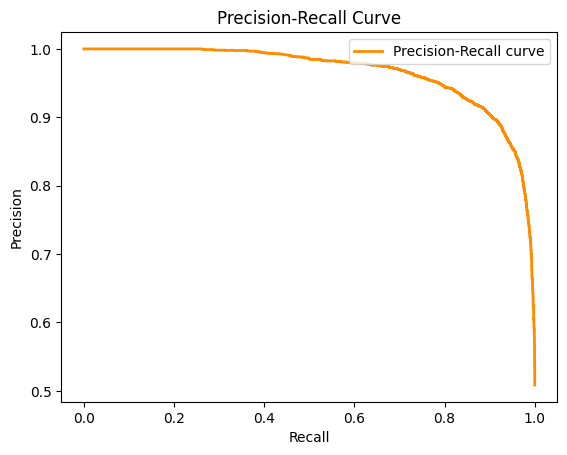

In [31]:

precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


The precision-recall curve shows a very good classifier, with a high area under the curve. This means that the classifier is good at both identifying the positive examples (precision) and avoiding the false positives (recall).